<a href="https://colab.research.google.com/github/JaiswalFelipe/Learning-Python/blob/main/DatesAndTimesPractical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Product Sales: Dates and Times Practical Project**
- Case study:
  - Analyze a company's data on product sales
<br></br>
- Main Task:
  - Obtain information about the product sales of the various retailer types in UTC offset. Display the average amount of sales that occurred in each time zone
<br></br>
- Solution map:
  - Subtask 1: Store the date and time values in a single column called "MOS" (Moment of Sale). Verify that the time zone values stored in "sales_data" are valid and can be manipulated with the pytz module. (Data Preparation)
  - Subtask 2: Estimate the offset of the values of "MOS" to UTC. Store them in a column called "OffsetUTC". (Data Manipulation)
  - Subtask 3: Order all sales according to a reconciled UTC-equivalent of the moment of sale and analyze the data. (Data Analysis)
  - Subtask 4: Obtain statistics and visualizations that will respond to the Main Task and further improve the analysis of your data. (Data Visualization)


### **Initial imports**

In [ ]:
import pandas as pd
import pytz
from datetime import datetime
from matplotlib import pyplot as plt

In [ ]:
#  The company dataset
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/365 Data Science/Programming/Dates and Times in Python/Files For Practical Dates and Times/Sales-products-tz-mod.csv",
                   index_col = "SaleID")
sales_data = data.copy()      # To preserve original data                                 
sales_data.head()

,RetailerCountry,RetailerType,Product,Sales Revenue ($),DateOfSale,TimeOfSale,TimeZone
SaleID,,,,,,,
SaleID_1,United States,Outdoors Shop,TrailChef Deluxe Cook Set,200.0,06/01/2020,23:20:56,EST
SaleID_2,United States,Outdoors Shop,TrailChef Double Flame,7.0,05/02/2020,17:27:08,EST
SaleID_3,United States,Outdoors Shop,Star Dome,20.0,30/10/2020,09:04:43,EST
SaleID_4,United States,Outdoors Shop,Star Gazer 2,40.0,13/11/2020,04:25:06,EST
SaleID_5,Italy,Outdoors Shop,Canyon Mule Carryall,150.5,06/12/2020,11:15:47,CET


In [ ]:
# Columns of interest
sales_data[['DateOfSale', 'TimeOfSale', 'TimeZone']].head()

,DateOfSale,TimeOfSale,TimeZone
SaleID,,,
SaleID_1,06/01/2020,23:20:56,EST
SaleID_2,05/02/2020,17:27:08,EST
SaleID_3,30/10/2020,09:04:43,EST
SaleID_4,13/11/2020,04:25:06,EST
SaleID_5,06/12/2020,11:15:47,CET


### **Data Preparation**


In [ ]:
# String concatenation to combine ['DateOfSale'] and ['TimeOfSale'] columns
date_and_time = sales_data['DateOfSale'] + " " + sales_data['TimeOfSale']       # Inserting whitespace between the cols to separate
date_and_time 

SaleID
SaleID_1      06/01/2020 23:20:56
SaleID_2      05/02/2020 17:27:08
SaleID_3      30/10/2020 09:04:43
SaleID_4      13/11/2020 04:25:06
SaleID_5      06/12/2020 11:15:47
                     ...         
SaleID_96     23/07/2019 12:30:03
SaleID_97     03/01/2019 01:39:14
SaleID_98     14/02/2019 21:29:35
SaleID_99     19/06/2020 11:16:19
SaleID_100    25/05/2019 15:51:41
Length: 100, dtype: object

In [ ]:
# Convert "date_and_time" column to a datetime object and add to the original dataset
sales_data['MOS'] = pd.to_datetime(date_and_time)
sales_data.head()

,RetailerCountry,RetailerType,Product,Sales Revenue ($),DateOfSale,TimeOfSale,TimeZone,MOS
SaleID,,,,,,,,
SaleID_1,United States,Outdoors Shop,TrailChef Deluxe Cook Set,200.0,06/01/2020,23:20:56,EST,2020-06-01 23:20:56
SaleID_2,United States,Outdoors Shop,TrailChef Double Flame,7.0,05/02/2020,17:27:08,EST,2020-05-02 17:27:08
SaleID_3,United States,Outdoors Shop,Star Dome,20.0,30/10/2020,09:04:43,EST,2020-10-30 09:04:43
SaleID_4,United States,Outdoors Shop,Star Gazer 2,40.0,13/11/2020,04:25:06,EST,2020-11-13 04:25:06
SaleID_5,Italy,Outdoors Shop,Canyon Mule Carryall,150.5,06/12/2020,11:15:47,CET,2020-06-12 11:15:47


In [ ]:
# Dropping the initial Date and Time of Sale columns from the dataset 
sales_data = sales_data.drop(['DateOfSale', 'TimeOfSale'], axis = 1)  # axis = 1 == Columns
sales_data.head()

,RetailerCountry,RetailerType,Product,Sales Revenue ($),TimeZone,MOS
SaleID,,,,,,
SaleID_1,United States,Outdoors Shop,TrailChef Deluxe Cook Set,200.0,EST,2020-06-01 23:20:56
SaleID_2,United States,Outdoors Shop,TrailChef Double Flame,7.0,EST,2020-05-02 17:27:08
SaleID_3,United States,Outdoors Shop,Star Dome,20.0,EST,2020-10-30 09:04:43
SaleID_4,United States,Outdoors Shop,Star Gazer 2,40.0,EST,2020-11-13 04:25:06
SaleID_5,Italy,Outdoors Shop,Canyon Mule Carryall,150.5,CET,2020-06-12 11:15:47


In [ ]:
# Using the pytz module which integrates the Olson database for working with timezones
# Check the timezone indications supported by the pytz module
pytz.all_timezones

['Africa/Abidjan',
 'Africa/Accra',
 'Africa/Addis_Ababa',
 'Africa/Algiers',
 'Africa/Asmara',
 'Africa/Asmera',
 'Africa/Bamako',
 'Africa/Bangui',
 'Africa/Banjul',
 'Africa/Bissau',
 'Africa/Blantyre',
 'Africa/Brazzaville',
 'Africa/Bujumbura',
 'Africa/Cairo',
 'Africa/Casablanca',
 'Africa/Ceuta',
 'Africa/Conakry',
 'Africa/Dakar',
 'Africa/Dar_es_Salaam',
 'Africa/Djibouti',
 'Africa/Douala',
 'Africa/El_Aaiun',
 'Africa/Freetown',
 'Africa/Gaborone',
 'Africa/Harare',
 'Africa/Johannesburg',
 'Africa/Juba',
 'Africa/Kampala',
 'Africa/Khartoum',
 'Africa/Kigali',
 'Africa/Kinshasa',
 'Africa/Lagos',
 'Africa/Libreville',
 'Africa/Lome',
 'Africa/Luanda',
 'Africa/Lubumbashi',
 'Africa/Lusaka',
 'Africa/Malabo',
 'Africa/Maputo',
 'Africa/Maseru',
 'Africa/Mbabane',
 'Africa/Mogadishu',
 'Africa/Monrovia',
 'Africa/Nairobi',
 'Africa/Ndjamena',
 'Africa/Niamey',
 'Africa/Nouakchott',
 'Africa/Ouagadougou',
 'Africa/Porto-Novo',
 'Africa/Sao_Tome',
 'Africa/Timbuktu',
 'Africa/

In [ ]:
# Show which timezones the dataset contains
sales_data['TimeZone'].unique()

array(['EST', 'CET', 'GMT', 'EET', 'SGT', 'Australia/West'], dtype=object)

In [ ]:
# Verify if the timezones can be found in the Olson Database
for i in sales_data['TimeZone'].unique():
  if i in (pytz.all_timezones):
    print(True)
  else:
    print(False)

True
True
True
True
False
True


In [ ]:
# Index 4 which is 'SGT' is not in the Olson Database.
# SGT stands for Singapore
sales_data.loc[:, 'TimeZone'] = sales_data.loc[:, 'TimeZone'].replace({'SGT': 'Singapore'})

In [ ]:
sales_data['TimeZone'].unique()

array(['EST', 'CET', 'GMT', 'EET', 'Singapore', 'Australia/West'],
      dtype=object)

In [ ]:
# Recheck
for i in sales_data['TimeZone'].unique():
  if i in (pytz.all_timezones):
    print(True)
  else:
    print(False)

True
True
True
True
True
True


In [ ]:
# Adjust the dataframe to have no limits on the displayed rows and columns (Clearer View)
pd.options.display.max_rows = None
pd.options.display.max_columns = None
sales_data

,RetailerCountry,RetailerType,Product,Sales Revenue ($),TimeZone,MOS
SaleID,,,,,,
SaleID_1,United States,Outdoors Shop,TrailChef Deluxe Cook Set,200.00,EST,2020-06-01 23:20:56
SaleID_2,United States,Outdoors Shop,TrailChef Double Flame,7.00,EST,2020-05-02 17:27:08
SaleID_3,United States,Outdoors Shop,Star Dome,20.00,EST,2020-10-30 09:04:43
SaleID_4,United States,Outdoors Shop,Star Gazer 2,40.00,EST,2020-11-13 04:25:06
SaleID_5,Italy,Outdoors Shop,Canyon Mule Carryall,150.50,CET,2020-06-12 11:15:47
SaleID_6,Italy,Outdoors Shop,Firefly 4,1300.00,CET,2020-07-06 01:54:41
SaleID_7,United Kingdom,Outdoors Shop,Husky Rope 50,270.00,GMT,2020-12-27 02:07:28
SaleID_8,United Kingdom,Outdoors Shop,Granite Signal Mirror,499.99,GMT,2020-09-15 11:44:57
SaleID_9,United Kingdom,Outdoors Shop,Granite Carabiner,32.00,GMT,2020-09-23 01:40:29


### **Data Manipulation**


In [ ]:
# Examine a single value from the "MOS" column before applying it to the entire column
sales_data['MOS'].iloc[0]

Timestamp('2020-06-01 23:20:56')

In [ ]:
# Obtain the time zone indication associated with the given sale of the "TimeZone" column using .tz_localize()
# This will transform the objects from timezone "naive" into "aware"
sales_data['MOS'].iloc[0].tz_localize(sales_data['TimeZone'].iloc[0])

Timestamp('2020-06-01 23:20:56-0500', tz='EST')

In [ ]:
# After testing, create "time zone aware" objects for all records
list_mos_timestamps = []

for i in range(len(sales_data)):
  list_mos_timestamps.append(pd.to_datetime(sales_data['MOS'].iloc[i].tz_localize(sales_data['TimeZone'].iloc[i],
                                                                                  ambiguous = 'raise',
                                                                                  nonexistent = 'raise')))
  
# The "raise" value allows you to obtain a message indicating an "exception" if a certain condition has not been met

In [ ]:
# Checking the elements of the list "list_mos_timestamps"
list_mos_timestamps

Timestamping

In [ ]:
print(list_mos_timestamps[0].date())
print(list_mos_timestamps[0].time())
print(list_mos_timestamps[0].utcoffset()) # -1 day (Behind UTC), 

# "+" indicates "Ahead of UTC"

2020-06-01
23:20:56
-1 day, 19:00:00


In [ ]:
# TESTING
# total seconds divided by 3600 (60 mins in an hr * 60 secs in a min)
# 19 and -1 days = -5.0 (19:00 on the previous day means 5 hours behind midnight at UTC)
list_mos_timestamps[0].utcoffset().total_seconds() / 3600

-5.0

In [ ]:
# After testing, create the "OffsetUTC" column 
# which will contain the UTC offset values of all the records 
sales_data['OffsetUTC'] = [list_mos_timestamps[i].utcoffset().total_seconds() / 3600 for i in range(len(sales_data))]
sales_data.head()

,RetailerCountry,RetailerType,Product,Sales Revenue ($),TimeZone,MOS,OffsetUTC
SaleID,,,,,,,
SaleID_1,United States,Outdoors Shop,TrailChef Deluxe Cook Set,200.0,EST,2020-06-01 23:20:56,-5.0
SaleID_2,United States,Outdoors Shop,TrailChef Double Flame,7.0,EST,2020-05-02 17:27:08,-5.0
SaleID_3,United States,Outdoors Shop,Star Dome,20.0,EST,2020-10-30 09:04:43,-5.0
SaleID_4,United States,Outdoors Shop,Star Gazer 2,40.0,EST,2020-11-13 04:25:06,-5.0
SaleID_5,Italy,Outdoors Shop,Canyon Mule Carryall,150.5,CET,2020-06-12 11:15:47,2.0


In [ ]:
# Rearrange column order for further usage I.E. analysis phase or model building
column_names_reordered = ['RetailerCountry', 'MOS', 'TimeZone', 'OffsetUTC', 'RetailerType', 'Product', 'Sales Revenue ($)']
sales_data = sales_data[column_names_reordered]
sales_data.head()

,RetailerCountry,MOS,TimeZone,OffsetUTC,RetailerType,Product,Sales Revenue ($)
SaleID,,,,,,,
SaleID_1,United States,2020-06-01 23:20:56,EST,-5.0,Outdoors Shop,TrailChef Deluxe Cook Set,200.0
SaleID_2,United States,2020-05-02 17:27:08,EST,-5.0,Outdoors Shop,TrailChef Double Flame,7.0
SaleID_3,United States,2020-10-30 09:04:43,EST,-5.0,Outdoors Shop,Star Dome,20.0
SaleID_4,United States,2020-11-13 04:25:06,EST,-5.0,Outdoors Shop,Star Gazer 2,40.0
SaleID_5,Italy,2020-06-12 11:15:47,CET,2.0,Outdoors Shop,Canyon Mule Carryall,150.5


In [ ]:
# Checking the "Day Light Saving System" (DST)
sales_data.groupby(['TimeZone', 'OffsetUTC']).count()

RetailerCountry  MOS  RetailerType  Product  \
TimeZone       OffsetUTC                                                
Australia/West  8.0                    17   17            17       17   
CET             1.0                     6    6             6        6   
                2.0                    10   10            10       10   
EET             2.0                     4    4             4        4   
                3.0                     4    4             4        4   
EST            -5.0                    40   40            40       40   
GMT             0.0                    11   11            11       11   
Singapore       8.0                     8    8             8        8   

                          Sales Revenue ($)  
TimeZone       OffsetUTC                     
Australia/West  8.0                      17  
CET             1.0                       6  
                2.0                      10  
EET             2.0                       4  
                3.0                       4  
EST            -5.0                      40  
GMT             0.0                      11  
Singapore       8.0                       8

In [ ]:
# Use "filtering" to obtain the relevant values for the timezones 
# And arrange them by their offset from UTC
sales_data[sales_data['TimeZone'] == 'CET'].sort_values('OffsetUTC')

,RetailerCountry,MOS,TimeZone,OffsetUTC,RetailerType,Product,Sales Revenue ($)
SaleID,,,,,,,
SaleID_31,Germany,2019-02-24 19:16:17,CET,1.0,Online Retailer,Firefly Climbing Lamp,23.00
SaleID_73,Switzerland,2019-03-26 09:52:36,CET,1.0,Mall,Course Pro Umbrella,100.32
SaleID_74,Switzerland,2020-03-07 14:17:34,CET,1.0,Mall,Course Pro Golf Bag,620.00
SaleID_75,Switzerland,2019-03-14 22:25:10,CET,1.0,Mall,Course Pro Gloves,40.50
SaleID_77,Austria,2020-11-05 13:06:45,CET,1.0,Department Store,Infinity,3100.00
SaleID_80,Austria,2020-12-05 05:30:58,CET,1.0,Warehouse Store,EverGlow Single,24.90
SaleID_5,Italy,2020-06-12 11:15:47,CET,2.0,Outdoors Shop,Canyon Mule Carryall,150.50
SaleID_6,Italy,2020-07-06 01:54:41,CET,2.0,Outdoors Shop,Firefly 4,1300.00
SaleID_10,Italy,2020-06-24 18:43:04,CET,2.0,Outdoors Shop,Granite Grip,220.00


### **Data Analysis**

In [ ]:
# Convert (using .tz_convert('UTC')) all the values to UTC and store these values in a different column 
sales_data['MOS-UTC'] = [pd.to_datetime(sales_data['MOS'].iloc[i]).tz_localize(sales_data['TimeZone'].iloc[i]).tz_convert('UTC')
                        for i in range(len(sales_data))]
sales_data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,RetailerCountry,MOS,TimeZone,OffsetUTC,RetailerType,Product,Sales Revenue ($),MOS-UTC
SaleID,,,,,,,,
SaleID_1,United States,2020-06-01 23:20:56,EST,-5.0,Outdoors Shop,TrailChef Deluxe Cook Set,200.0,2020-06-02 04:20:56+00:00
SaleID_2,United States,2020-05-02 17:27:08,EST,-5.0,Outdoors Shop,TrailChef Double Flame,7.0,2020-05-02 22:27:08+00:00
SaleID_3,United States,2020-10-30 09:04:43,EST,-5.0,Outdoors Shop,Star Dome,20.0,2020-10-30 14:04:43+00:00
SaleID_4,United States,2020-11-13 04:25:06,EST,-5.0,Outdoors Shop,Star Gazer 2,40.0,2020-11-13 09:25:06+00:00
SaleID_5,Italy,2020-06-12 11:15:47,CET,2.0,Outdoors Shop,Canyon Mule Carryall,150.5,2020-06-12 09:15:47+00:00


In [ ]:
# Reorder column for further usage
column_names_reordered = ['RetailerCountry', 'MOS-UTC', 'MOS', 'TimeZone', 'OffsetUTC', 'RetailerType', 'Product', 'Sales Revenue ($)']
sales_data = sales_data[column_names_reordered]
sales_data.head()

# Having "MOS-UTC" and "MOS" side-by-side allows you to make a proper comparison between the 2 datetime values

,RetailerCountry,MOS-UTC,MOS,TimeZone,OffsetUTC,RetailerType,Product,Sales Revenue ($)
SaleID,,,,,,,,
SaleID_1,United States,2020-06-02 04:20:56+00:00,2020-06-01 23:20:56,EST,-5.0,Outdoors Shop,TrailChef Deluxe Cook Set,200.0
SaleID_2,United States,2020-05-02 22:27:08+00:00,2020-05-02 17:27:08,EST,-5.0,Outdoors Shop,TrailChef Double Flame,7.0
SaleID_3,United States,2020-10-30 14:04:43+00:00,2020-10-30 09:04:43,EST,-5.0,Outdoors Shop,Star Dome,20.0
SaleID_4,United States,2020-11-13 09:25:06+00:00,2020-11-13 04:25:06,EST,-5.0,Outdoors Shop,Star Gazer 2,40.0
SaleID_5,Italy,2020-06-12 09:15:47+00:00,2020-06-12 11:15:47,CET,2.0,Outdoors Shop,Canyon Mule Carryall,150.5


In [ ]:
# Sort values "Chronologically" to see which sales happend first to last
sales_data.sort_values(['MOS-UTC'])

,RetailerCountry,MOS-UTC,MOS,TimeZone,OffsetUTC,RetailerType,Product,Sales Revenue ($)
SaleID,,,,,,,,
SaleID_60,Canada,2019-01-03 04:10:36+00:00,2019-01-02 23:10:36,EST,-5.0,Outdoors Shop,Polar Sun,32.00
SaleID_33,Canada,2019-01-16 18:33:16+00:00,2019-01-16 13:33:16,EST,-5.0,Outdoors Shop,Venue,110.00
SaleID_87,Australia,2019-01-18 20:29:44+00:00,2019-01-19 04:29:44,Australia/West,8.0,Sports Store,Star Peg,37.85
SaleID_18,Singapore,2019-01-31 17:32:09+00:00,2019-02-01 01:32:09,Singapore,8.0,Outdoors Shop,Granite Pulley,19.00
SaleID_98,Australia,2019-02-14 13:29:35+00:00,2019-02-14 21:29:35,Australia/West,8.0,Discount Retailer,Polar Sun,32.00
SaleID_19,Singapore,2019-02-19 23:07:10+00:00,2019-02-20 07:07:10,Singapore,8.0,Outdoors Shop,Firefly Climbing Lamp,23.45
SaleID_31,Germany,2019-02-24 18:16:17+00:00,2019-02-24 19:16:17,CET,1.0,Online Retailer,Firefly Climbing Lamp,23.00
SaleID_97,Australia,2019-02-28 17:39:14+00:00,2019-03-01 01:39:14,Australia/West,8.0,Department Store,Firefly Mapreader,1200.00
SaleID_53,Canada,2019-03-01 20:40:25+00:00,2019-03-01 15:40:25,EST,-5.0,Sports Store,Opera Vision,450.00


In [ ]:
# Next, GROUP the records by the values in the "TimeZone" Column and see what's the "average offset from UTC" of that group
sales_data.groupby('TimeZone').mean()

# DST system causes "OffsetUTC" values to have float because "CET" and "EET" has 2 values each. 

,OffsetUTC,Sales Revenue ($)
TimeZone,,
Australia/West,8.000,273.105882
CET,1.625,415.710000
EET,2.500,586.687500
EST,-5.000,230.385500
GMT,0.000,115.137273
Singapore,8.000,27.688750


In [ ]:
# Check the number of sales in a time zone
sales_data.groupby('TimeZone').count()

,RetailerCountry,MOS-UTC,MOS,OffsetUTC,RetailerType,Product,Sales Revenue ($)
TimeZone,,,,,,,
Australia/West,17,17,17,17,17,17,17
CET,16,16,16,16,16,16,16
EET,8,8,8,8,8,8,8
EST,40,40,40,40,40,40,40
GMT,11,11,11,11,11,11,11
Singapore,8,8,8,8,8,8,8


In [ ]:
# To include the DST information
sales_data.groupby(['TimeZone', 'OffsetUTC']).count()

RetailerCountry  MOS-UTC  MOS  RetailerType  \
TimeZone       OffsetUTC                                                
Australia/West  8.0                    17       17   17            17   
CET             1.0                     6        6    6             6   
                2.0                    10       10   10            10   
EET             2.0                     4        4    4             4   
                3.0                     4        4    4             4   
EST            -5.0                    40       40   40            40   
GMT             0.0                    11       11   11            11   
Singapore       8.0                     8        8    8             8   

                          Product  Sales Revenue ($)  
TimeZone       OffsetUTC                              
Australia/West  8.0            17                 17  
CET             1.0             6                  6  
                2.0            10                 10  
EET             2.0             4                  4  
                3.0             4                  4  
EST            -5.0            40                 40  
GMT             0.0            11                 11  
Singapore       8.0             8                  8

In [ ]:
# Group "all sales" by "timezones" from the one with the "highest" number of sales to the one with the "lowest"
sales_data.groupby('TimeZone').count().sort_values('Product', ascending = False)

,RetailerCountry,MOS-UTC,MOS,OffsetUTC,RetailerType,Product,Sales Revenue ($)
TimeZone,,,,,,,
EST,40,40,40,40,40,40,40
Australia/West,17,17,17,17,17,17,17
CET,16,16,16,16,16,16,16
GMT,11,11,11,11,11,11,11
EET,8,8,8,8,8,8,8
Singapore,8,8,8,8,8,8,8


### **Data Visualization**

In [ ]:
sales_data.head()

,RetailerCountry,MOS-UTC,MOS,TimeZone,OffsetUTC,RetailerType,Product,Sales Revenue ($)
SaleID,,,,,,,,
SaleID_1,United States,2020-06-02 04:20:56+00:00,2020-06-01 23:20:56,EST,-5.0,Outdoors Shop,TrailChef Deluxe Cook Set,200.0
SaleID_2,United States,2020-05-02 22:27:08+00:00,2020-05-02 17:27:08,EST,-5.0,Outdoors Shop,TrailChef Double Flame,7.0
SaleID_3,United States,2020-10-30 14:04:43+00:00,2020-10-30 09:04:43,EST,-5.0,Outdoors Shop,Star Dome,20.0
SaleID_4,United States,2020-11-13 09:25:06+00:00,2020-11-13 04:25:06,EST,-5.0,Outdoors Shop,Star Gazer 2,40.0
SaleID_5,Italy,2020-06-12 09:15:47+00:00,2020-06-12 11:15:47,CET,2.0,Outdoors Shop,Canyon Mule Carryall,150.5


In [ ]:
# To obtain the relevant visualizations where the records are arranged "Chronologically", 
# Use "MOS-UTC" as index instead of SaleID, because it can help you to plot the data along a "timeline"
sales_data_viz = sales_data.reset_index()   # This will assign the "Default" integer index
sales_data_viz.head()

,SaleID,RetailerCountry,MOS-UTC,MOS,TimeZone,OffsetUTC,RetailerType,Product,Sales Revenue ($)
0,SaleID_1,United States,2020-06-02 04:20:56+00:00,2020-06-01 23:20:56,EST,-5.0,Outdoors Shop,TrailChef Deluxe Cook Set,200.0
1,SaleID_2,United States,2020-05-02 22:27:08+00:00,2020-05-02 17:27:08,EST,-5.0,Outdoors Shop,TrailChef Double Flame,7.0
2,SaleID_3,United States,2020-10-30 14:04:43+00:00,2020-10-30 09:04:43,EST,-5.0,Outdoors Shop,Star Dome,20.0
3,SaleID_4,United States,2020-11-13 09:25:06+00:00,2020-11-13 04:25:06,EST,-5.0,Outdoors Shop,Star Gazer 2,40.0
4,SaleID_5,Italy,2020-06-12 09:15:47+00:00,2020-06-12 11:15:47,CET,2.0,Outdoors Shop,Canyon Mule Carryall,150.5


In [ ]:
# Assign the MOS-UTC as "index_value" and then sort "Chronologically"
sales_data_viz = sales_data_viz.set_index('MOS-UTC').sort_index()
sales_data_viz.head()

,SaleID,RetailerCountry,MOS,TimeZone,OffsetUTC,RetailerType,Product,Sales Revenue ($)
MOS-UTC,,,,,,,,
2019-01-03 04:10:36+00:00,SaleID_60,Canada,2019-01-02 23:10:36,EST,-5.0,Outdoors Shop,Polar Sun,32.00
2019-01-16 18:33:16+00:00,SaleID_33,Canada,2019-01-16 13:33:16,EST,-5.0,Outdoors Shop,Venue,110.00
2019-01-18 20:29:44+00:00,SaleID_87,Australia,2019-01-19 04:29:44,Australia/West,8.0,Sports Store,Star Peg,37.85
2019-01-31 17:32:09+00:00,SaleID_18,Singapore,2019-02-01 01:32:09,Singapore,8.0,Outdoors Shop,Granite Pulley,19.00
2019-02-14 13:29:35+00:00,SaleID_98,Australia,2019-02-14 21:29:35,Australia/West,8.0,Discount Retailer,Polar Sun,32.00


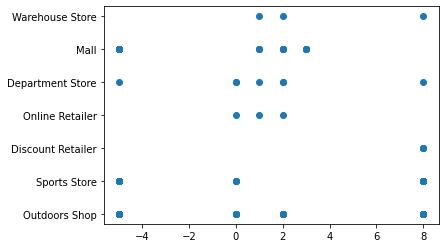

In [ ]:
# Display the offset from UTC values along a timeline

# This scatterplot displays the type of retailer shop selling company products in the different time zones around the globe
plt.scatter(sales_data_viz['OffsetUTC'], sales_data_viz['RetailerType'])

# It shows that "Online Retailer"s are only succesful in EUROPE 
# where "GMT and timezones" that are "1 and 2 hrs" ahead apply

# No "Warehouse Store", "Mall", "Discount Retailer" sales are registered in the GMT "0"

In [ ]:
# Barchart to display how the "sale amounts" differ in the various "time zones"
# TOTAL

# First:
total_sales_revenue_by_timezone = sales_data_viz.groupby('TimeZone').sum()  
total_sales_revenue_by_timezone

,OffsetUTC,Sales Revenue ($)
TimeZone,,
Australia/West,136.0,4642.80
CET,26.0,6651.36
EET,20.0,4693.50
EST,-200.0,9215.42
GMT,0.0,1266.51
Singapore,64.0,221.51


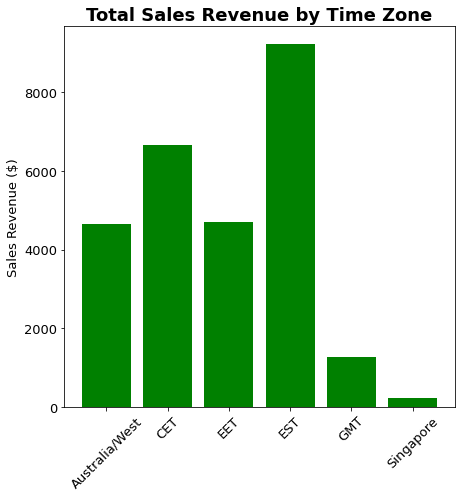

In [ ]:
# TOTAL sales revenue per time zone
plt.figure(figsize = (7, 7))

plt.bar(total_sales_revenue_by_timezone.index,                          # TimeZone for the x-axis 
        height = total_sales_revenue_by_timezone['Sales Revenue ($)'],  # y-axis
        color = 'green')

plt.xticks(rotation = 45, fontsize = 13)
plt.yticks(fontsize = 13)
plt.title("Total Sales Revenue by Time Zone", fontsize = 18, fontweight = "bold")
plt.ylabel("Sales Revenue ($)", fontsize = 13)

plt.show()

In [ ]:
# AVERAGE as opposed to "total" sales
avg_by_timezone = sales_data_viz.groupby('TimeZone').mean().sort_values('Sales Revenue ($)', ascending = False)
avg_by_timezone

,OffsetUTC,Sales Revenue ($)
TimeZone,,
EET,2.500,586.687500
CET,1.625,415.710000
Australia/West,8.000,273.105882
EST,-5.000,230.385500
GMT,0.000,115.137273
Singapore,8.000,27.688750


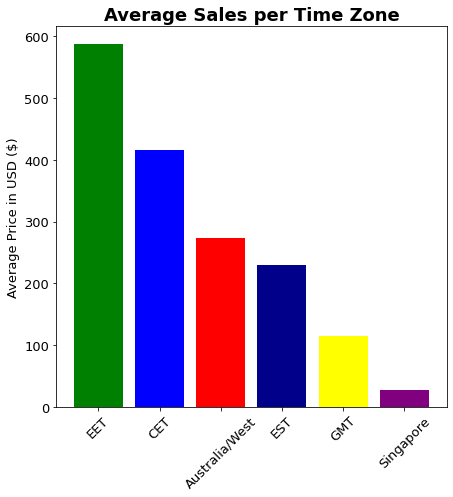

In [ ]:
# Average Sales per Time Zone
plt.figure(figsize = (7, 7))

plt.bar(avg_by_timezone.index,                                         
        height = avg_by_timezone['Sales Revenue ($)'],  
        color = ['green', 'blue', 'red', 'darkblue', 'yellow', 'purple'])

plt.xticks(rotation = 45, fontsize = 13)
plt.yticks(fontsize = 13)
plt.title("Average Sales per Time Zone", fontsize = 18, fontweight = "bold")
plt.ylabel("Average Price in USD ($)", fontsize = 13)

plt.show()